# Israeli shores EDA

kepler-gl (3).png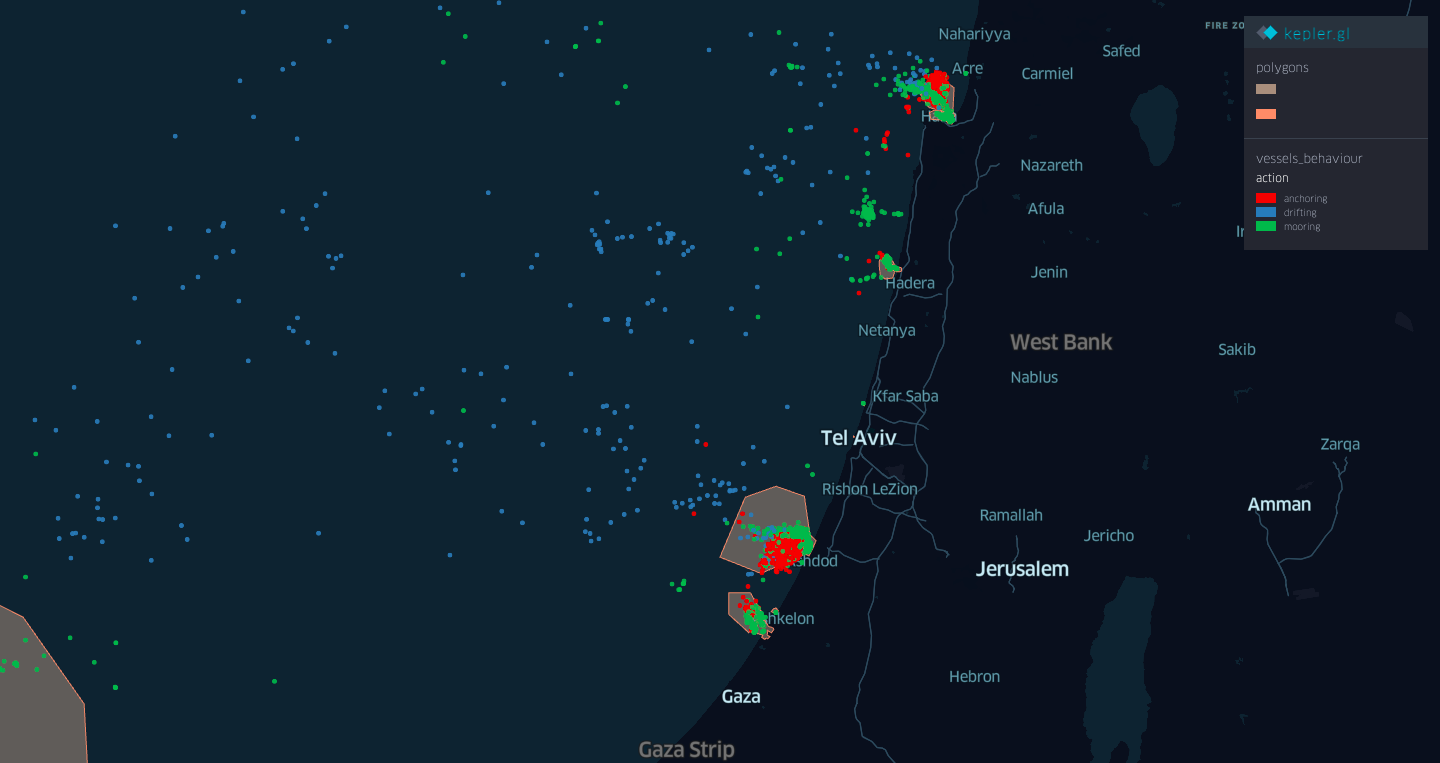

### Ashdod Port
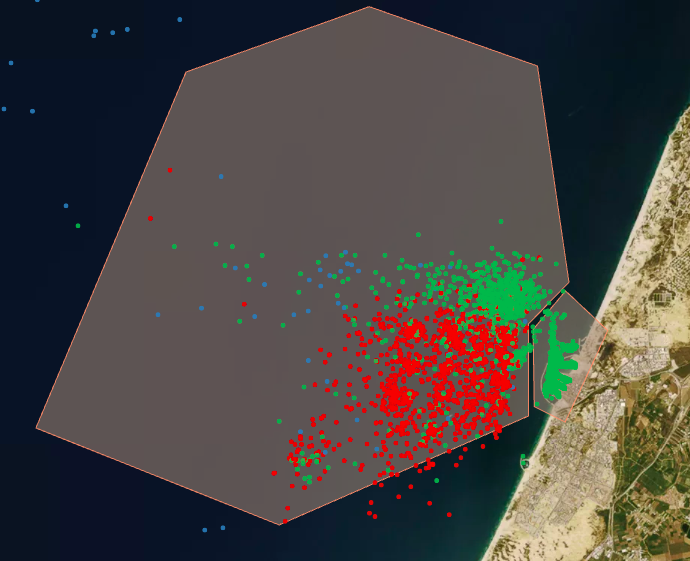

### Haifa Port
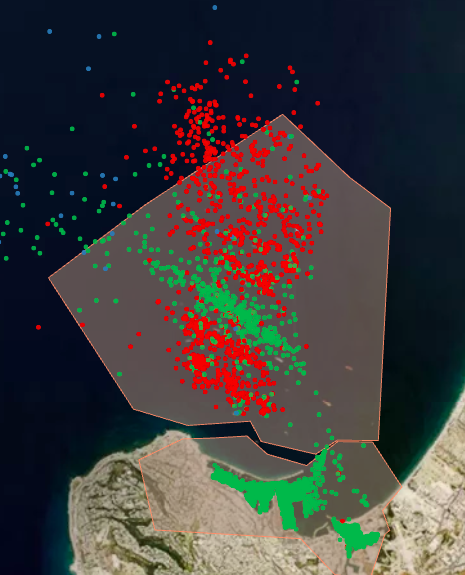

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
from keplergl import KeplerGl
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_full = pd.read_csv('israel_vessel_activity.csv')

In [6]:
cols_for_EDA = ['vesselId','action','class_calc','firstBlip_lat', 'firstBlip_lng', 'deadweight','size','max_draught', 'grosstonnage', 'flag']

In [7]:
df = df_full[cols_for_EDA]

In [8]:
df.head()

,vesselId,action,class_calc,firstBlip_lat,firstBlip_lng,deadweight,size,max_draught,grosstonnage,flag
0,5905c4c20ed6155845fddce2,anchoring,Cargo,32.89243,35.00322,10100.0,113.0,8.023 m,6001.0,Panama
1,5905c4c20ed6155845fddce2,anchoring,Cargo,32.84778,35.00698,10100.0,113.0,8.023 m,6001.0,Panama
2,5905c4c20ed6155845fddce2,anchoring,Cargo,32.87632,35.00605,10100.0,113.0,8.023 m,6001.0,Panama
3,5905c4c20ed6155845fddce2,mooring,Cargo,32.85873,35.00038,10100.0,113.0,8.023 m,6001.0,Panama
4,5905c4c20ed6155845fddce2,mooring,Cargo,32.87115,35.00087,10100.0,113.0,8.023 m,6001.0,Panama


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6305 entries, 0 to 6304
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   vesselId       6305 non-null   object 
 1   action         6305 non-null   object 
 2   class_calc     6305 non-null   object 
 3   firstBlip_lat  6305 non-null   float64
 4   firstBlip_lng  6305 non-null   float64
 5   deadweight     6289 non-null   float64
 6   size           6305 non-null   float64
 7   max_draught    5641 non-null   object 
 8   grosstonnage   6294 non-null   float64
 9   flag           6305 non-null   object 
dtypes: float64(5), object(5)
memory usage: 492.7+ KB


In [10]:
# missing values
print(f'{df.shape[0]} records of {df.vesselId.nunique()} ships.')
print(f'Missing values by field:\n {df.isnull().sum()}')

6305 records of 766 ships.
Missing values by field:
 vesselId           0
action             0
class_calc         0
firstBlip_lat      0
firstBlip_lng      0
deadweight        16
size               0
max_draught      664
grosstonnage      11
flag               0
dtype: int64


In [11]:
print('Number of records per activity:')
df['action'].value_counts()

Number of records per activity:


mooring      4020
anchoring    1888
drifting      397
Name: action, dtype: int64

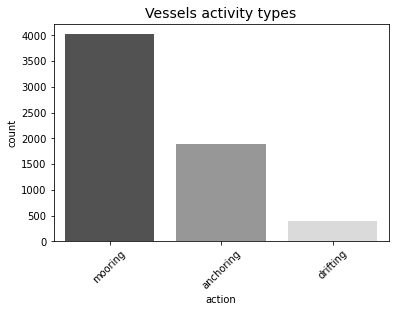

In [12]:
sns.countplot(x='action',  data=df, palette='Greys_r',
             order=df.action.value_counts().index)
plt.xticks(rotation=45)
plt.title('Vessels activity types', fontsize=14)
plt.show()

In [13]:
# Vessels types
print('Distribution of vessel types:')
df['class_calc'].value_counts()

Distribution of vessel types:


Cargo            3661
ServiceVessel    1690
Tanker            948
Passenger           4
Other               2
Name: class_calc, dtype: int64

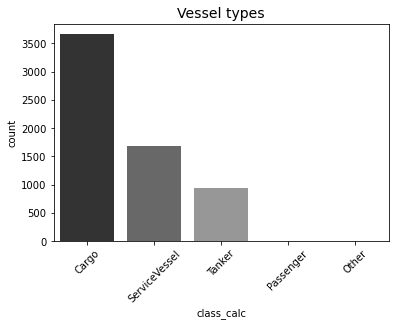

In [14]:
sns.countplot(x='class_calc',  data=df, palette='Greys_r',
             order=df.class_calc.value_counts().index)
plt.xticks(rotation=45)
plt.title('Vessel types', fontsize=14)
plt.show()

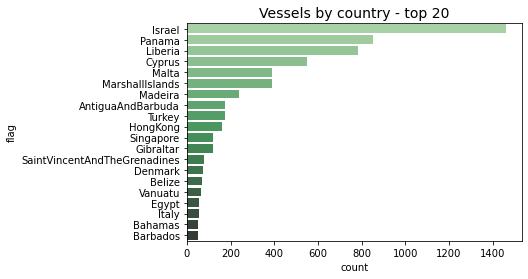

In [15]:
sns.countplot(y="flag",  data=df, palette="Greens_d",
              order=df.flag.value_counts().iloc[:20].index)
plt.title('Vessels by country - top 20', fontsize=14)
plt.show()

/Users/EF/opt/anaconda3/envs/geopandas_env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


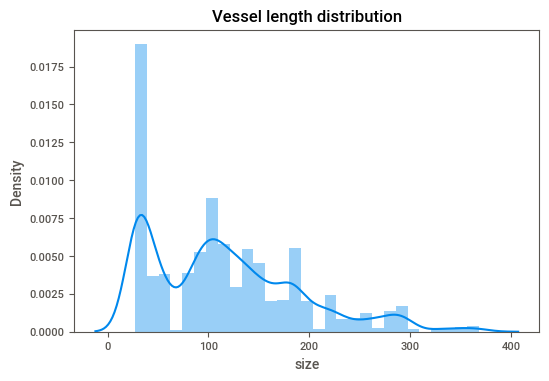

In [26]:
sns.distplot(df['size'])
plt.title('Vessel length distribution')
plt.show()

In [27]:
df['max_draught_num'] = df.max_draught.str.extract('(\d+)')

<ipython-input-27-141236c724e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_draught_num'] = df.max_draught.str.extract('(\d+)')


/Users/EF/opt/anaconda3/envs/geopandas_env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


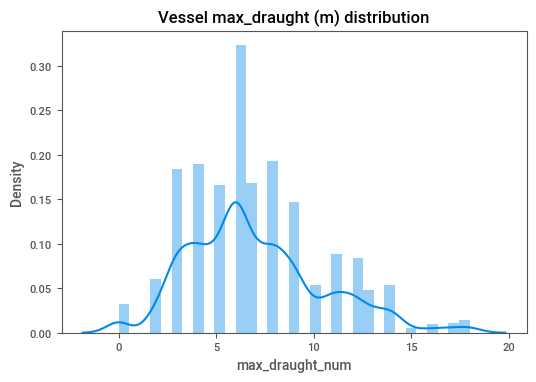

In [30]:
sns.distplot(df['max_draught_num'])
plt.title('Vessel max_draught (m) distribution')
plt.show()

In [32]:
df['deadweight'].corr(df['grosstonnage'])

0.9354477208775611

/Users/EF/opt/anaconda3/envs/geopandas_env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


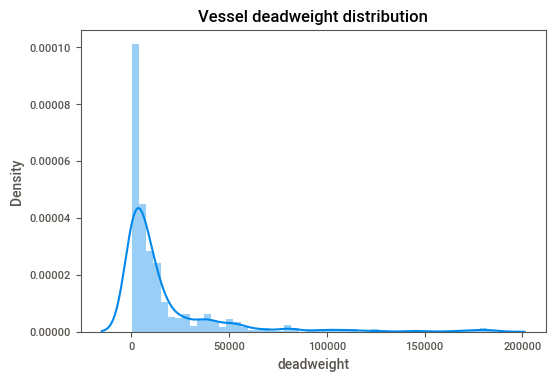

In [33]:
sns.distplot(df['deadweight'])
plt.title('Vessel deadweight distribution')
plt.show()

In [24]:
import sweetviz as sv

In [25]:
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
